In [1]:
import pandas as pd #package already installed in anaconda, need to call it up - call it pd arbitrarily for convenience

In [3]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
} # dictoinary with keys (fruits) and values (numbers for each fruit) - each key-value pair is a series

In [5]:
purchases = pd.DataFrame(data) #call function from pandas library by using pd
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [7]:
#want to provide names for customers
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

In [8]:
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [10]:
purchases.loc['June'] #to query index values in Pandas need to use .loc command

apples     3
oranges    0
Name: June, dtype: int64

In [12]:
#reading in data from csv files - csv files need to be in same directory as jupyter notebook
df = pd.read_csv('purchases.csv')

In [14]:
df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


In [16]:
#want index to be the first column (people's names)
df = pd.read_csv('purchases.csv', index_col=0)
df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [18]:
#import json file
df = pd.read_json('purchases.json') #in json file, index is already listed as index
df

,apples,oranges
David,1,2
June,3,0
Lily,0,7
Robert,2,3


In [20]:
# to convert back into a file to save onto the drive directory
df.to_csv('new_purchases.csv') #pandas function but no pd command because inherent in the df

In [22]:
#play with imdb movie data
movies_df = pd.read_csv('IMDB-Movie-Data.csv', index_col='Title')

In [24]:
movies_df.head() #to look at first couple rows in data set - can also specify how many rows inside command

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [26]:
movies_df.tail(1) #last rows

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [28]:
movies_df.info() #missing data in revenue and metascore

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [30]:
#how to handle duplicates
temp_df = movies_df.append(movies_df)
temp_df.shape #gives number of rows and number of columns

(2000, 11)

In [31]:
temp_df = temp_df.drop_duplicates() #keeps first entry and drops second of same entry
temp_df.shape

(1000, 11)

In [101]:
movies_df.columns #returns pandas object of a list of columns
movies_df.rename(columns = {
    'Runtime (Minutes)':'Runtime',
    'Revenue (Millions)': 'Revenue_millions'}, inplace=True)#need to enter column information as a dictionry w/ key as value that we want to change
#also, include inplace as TRUE so it doesn't create new dataframe and instead just substitutes names on existing

In [37]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue-millions', 'Metascore'],
      dtype='object')

In [38]:
#deal with missing values
movies_df.isnull() #returns true/false for each cell 
movies_df.isnull().sum() #returns sum of False cells for each column
movies_df.dropna #drops all NAs (equivalent to complete.cases in R)
movies_df.dropna(axis=1) #drops columns with missing values in them


,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188


In [42]:
#imputation
movies_df.isnull().sum()
revenue = movies_df['Revenue-millions'] #index column
revenue_mean = revenue.mean() #finds mean of values
revenue.fillna(revenue_mean, inplace = True) #replace missing values in original df with mean of revenue
movies_df.isnull().sum() #check

Rank                 0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenue-millions     0
Metascore           64
dtype: int64

In [44]:
movies_df.describe() # to get descriptive stats

,Rank,Year,Runtime,Rating,Votes,Revenue-millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [45]:
movies_df['Genre'].describe() #specify column

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [46]:
movies_df['Genre'].value_counts().head(5) #counts for specific categories within genres + just looking at top five

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
Name: Genre, dtype: int64

In [48]:
movies_df.corr() #simple correlation matrix

,Rank,Year,Runtime,Rating,Votes,Revenue-millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenue-millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [49]:
genre_col = movies_df['Genre'] #index genre column
type(genre_col) #type changes to series (no longer dataframe) because only one column

pandas.core.series.Series

In [52]:
subset = movies_df[['Genre', 'Rating']] #double square brackets to keep as dataframe
type(subset)

pandas.core.frame.DataFrame

In [54]:
prom = movies_df.loc['Prometheus'] #index row using index title
prom

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue-millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [56]:
#can also index rows using location 
movies_df.iloc[1] #add the i before the loc command to search by location

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue-millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [57]:
movie_subset = movies_df.loc['Prometheus': 'Sing'] #index range from prom to sing
movie_subset = movies_df.iloc[1:4] #also by location, NOT INCLUSIVE ON RIGHT SIDE!!!!

In [59]:
# get movies directed by specific director
condition = (movies_df['Director'] == "Ridley Scott") #returns true for ridley scott, false otherwise
condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: Director, dtype: bool

In [61]:
movies_df[movies_df['Director'] == "Ridley Scott"] #return values from movies_df where director is ridley

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [64]:
#get movies above certain ratings
movies_df[movies_df['Rating'] >= 8.6].head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [66]:
#get movies with two conditions met
movies_df[(movies_df['Director'] == "Ridley Scott")| (movies_df['Director'] == "Christopher Nolan")]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


In [68]:
#with multiple conditions
movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010)) #condition number 1
    & (movies_df['Rating'] > 8.0) #second condition
    & (movies_df['Revenue-millions'] < movies_df['Revenue-millions'].quantile(0.25)) #third condition, below 25% revenue
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [69]:
#define function to turn continuous ratings into categorical good bad values
def rating_function(x):
    if x >8.0:
        return "good"
    else:
        return "bad"

In [71]:
movies_df['Rating_category'] = movies_df['Rating'].apply(rating_function) #apply rating function to specific column + save to new column

In [73]:
movies_df.head(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore,Rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


# Plotting

In [75]:
import matplotlib.pyplot as plt #import plotting package - usually don't need to access directly, rather pandas uses it

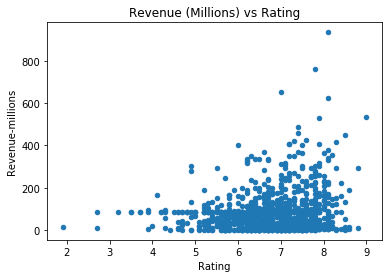

In [77]:
#scatterplot
movies_df.plot(kind = 'scatter', x = 'Rating', y = 'Revenue-millions', title = 'Revenue (Millions) vs Rating'); #semicolon to remove ugly message
plt.show() #also removes ugly text at the beginning by calling on package directly

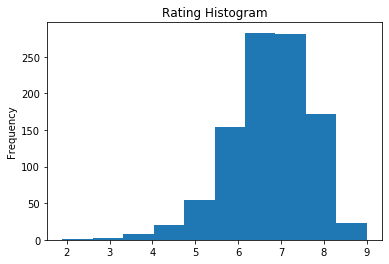

In [80]:
#histogram
movies_df['Rating'].plot(kind = 'hist', title = 'Rating Histogram');

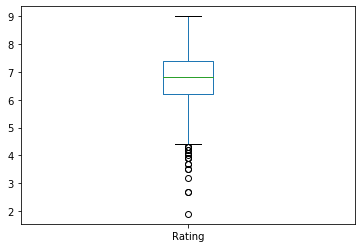

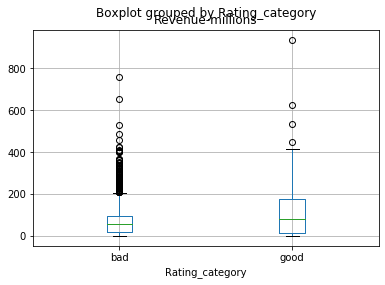

In [84]:
#boxplot
movies_df['Rating'].plot(kind = 'box');
movies_df.boxplot(column = 'Revenue-millions', by = 'Rating_category'); #by splits up df by two options in variable

In [86]:
#look up highest grossing movie
movies_df[movies_df['Revenue-millions'] > 800]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore,Rating_category
Title,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,good


In [89]:
#look up highest grossing movie in 2015
movies_df[(movies_df['Revenue-millions'] > 800) & (movies_df['Year'] == 2015)]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue-millions,Metascore,Rating_category
Title,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,good


In [90]:
#use seaborn package to make nice plots
import seaborn as sns

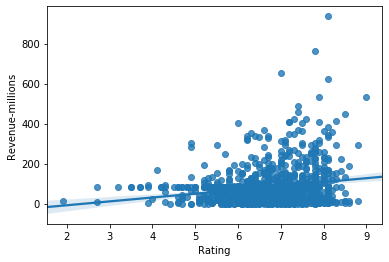

In [92]:
#scatterplot with line of best fit (linear)
sns.regplot(x = 'Rating', y = 'Revenue-millions', data = movies_df);

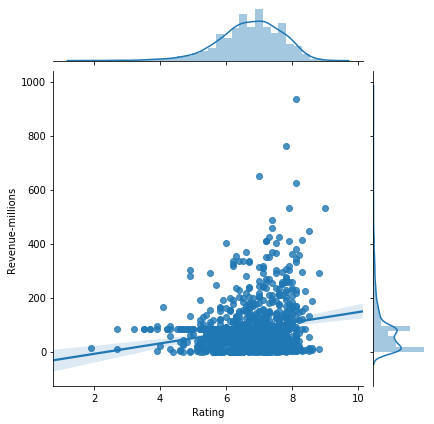

In [94]:
#joint plot
sns.jointplot(x = 'Rating', y = 'Revenue-millions', data = movies_df, kind = 'reg'); # kind is regression

In [98]:
#stats models package for simple stats - interpretable data
import statsmodels.formula.api as smf

In [109]:
#put in formula for model as a string (y ~ x)

model = smf.ols('Revenue_millions ~ Rating', data = movies_df).fit()# .fit finds line of best fit
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Revenue_millions   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     37.18
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           1.53e-09
Time:                        17:36:04   Log-Likelihood:                -5968.8
No. Observations:                1000   AIC:                         1.194e+04
Df Residuals:                     998   BIC:                         1.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.9859     21.519     -2.183      0.0

In [110]:
movies_df.columns
movies_df.rename(columns = {
    'Revenue-millions': 'Revenue_millions'}, inplace=True)

In [111]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore', 'Rating_category'],
      dtype='object')

Needed to change revenue-millions to revenue_millions because otherwise model won't work